In [46]:
import numpy as np
import pandas as pd

In [42]:
rfm = pd.read_csv("../data/rfm_datamart.csv")

In [47]:
rfm = rfm.set_index('CustomerID')

In [48]:
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.70
12748,1,888,7046.16
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15


In [49]:
rfm.describe()

,Recency,Frequency,MonetaryValue
count,3643.00000,3643.000000,3643.000000
mean,90.43563,18.714247,370.694387
std,94.44651,43.754468,1347.443451
min,1.00000,1.000000,0.650000
25%,19.00000,4.000000,58.705000
50%,51.00000,9.000000,136.370000
75%,139.00000,21.000000,334.350000
max,365.00000,1497.000000,48060.350000


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


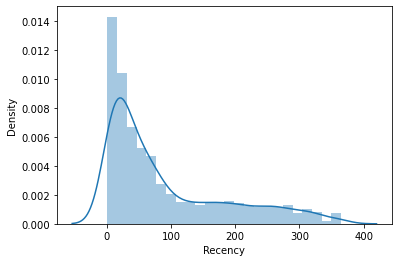

In [51]:
sns.distplot(rfm['Recency'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


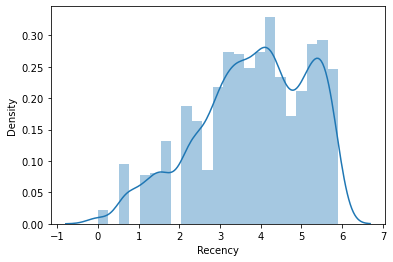

In [52]:
#logarithmic transformation (positive values only)
rec_log = np.log(rfm['Recency'])
sns.distplot(rec_log)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


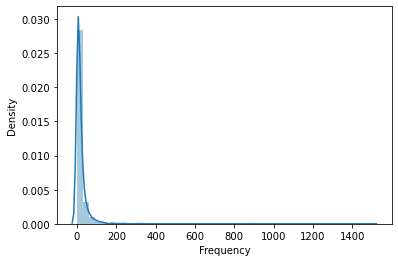

In [53]:
sns.distplot(rfm['Frequency'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


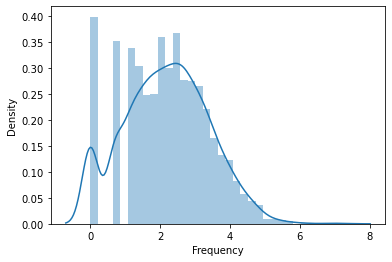

In [54]:
#logarithmic transformation (positive values only)
freq_log = np.log(rfm['Frequency'])
sns.distplot(freq_log)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


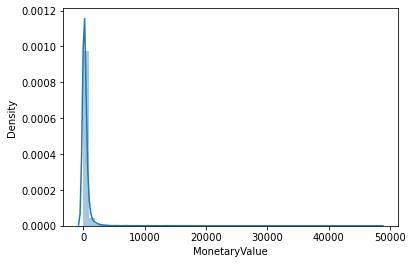

In [55]:
sns.distplot(rfm['MonetaryValue'])
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


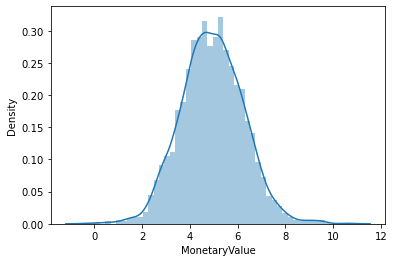

In [56]:
#logarithmic transformation (positive values only)
money_log = np.log(rfm['MonetaryValue'])
sns.distplot(money_log)
plt.show()

In [57]:
#Unskew the data
rfm_log = np.log(rfm)

In [58]:
rfm_log.describe()

,Recency,Frequency,MonetaryValue
count,3643.000000,3643.000000,3643.000000
mean,3.806481,2.171902,4.934900
std,1.352631,1.210321,1.310945
min,0.000000,0.000000,-0.430783
25%,2.944439,1.386294,4.072524
50%,3.931826,2.197225,4.915372
75%,4.934474,3.044522,5.812188
max,5.899897,7.311218,10.780213


In [59]:
#Centering and Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
rfm_normalized = scaler.transform(rfm_log)


In [60]:
print('mean: ', rfm_normalized.mean(axis=0).round(2))
print('std: ', rfm_normalized.std(axis=0).round(2))

mean:  [-0.  0.  0.]
std:  [1. 1. 1.]


In [61]:
rfm_normalized = pd.DataFrame(rfm_normalized, index=rfm.index, columns=rfm.columns)

In [62]:
rfm_normalized.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,-2.002202,0.865157,1.464940
12748,-2.814518,3.815272,2.994692
12749,-1.789490,1.189117,1.347598
12820,-1.789490,0.546468,0.500595
12822,0.337315,0.020925,0.037943


In [63]:
rfm_normalized.describe()

,Recency,Frequency,MonetaryValue
count,3.643000e+03,3.643000e+03,3.643000e+03
mean,-4.175146e-17,1.724152e-16,3.383696e-16
std,1.000137e+00,1.000137e+00,1.000137e+00
min,-2.814518e+00,-1.794731e+00,-4.093550e+00
25%,-6.373949e-01,-6.491795e-01,-6.579180e-01
50%,9.268036e-02,2.092505e-02,-1.489805e-02
75%,8.340401e-01,7.210817e-01,6.692948e-01
max,1.547876e+00,4.246826e+00,4.459466e+00
